# **Extracting and Visualizing Stock Data**

### _**Description**_

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

In [187]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [188]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [189]:
# In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [190]:
# Define Graphing Function

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 1: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [191]:
# Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

Tesla = yf.Ticker("TSLA")

In [192]:
# Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

Tesla = yf.Ticker("TSLA")
Tesla

yfinance.Ticker object <TSLA>

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [193]:
tesla_data = Tesla.history(period = "max")
tesla_data

# The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, Dividends and Stock Splits are given for each day.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-15 00:00:00-05:00,310.570007,324.679993,309.220001,320.720001,114440300,0.0,0.0
2024-11-18 00:00:00-05:00,340.730011,348.549988,330.010010,338.739990,126547500,0.0,0.0
2024-11-19 00:00:00-05:00,335.760010,347.380005,332.750000,346.000000,88852500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [194]:
# We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

tesla_data.reset_index(inplace = True)

In [195]:
# Displaying the first five rows of the tesla_data dataframe using the head function

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [196]:
# Sending an HTTP request to the web page

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [197]:
# Using the request library for sending an HTTP request to the web page.

html_data  = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [198]:
# Parse the html_data using beautiful_soup using parser i.e. html5lib or html.parser.

beautiful_soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [199]:
# Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue
# The dataframe should have columns Date and Revenue.

data = []
for table in beautiful_soup.find_all("table"):
    if any(["Tesla Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text # .replace("$", " ").replace(",", "")
            })
tesla_revenue = pd.DataFrame(data)

Execute the following line to remove the comma and dollar sign from the `Revenue` column.

In [200]:
# Execute the following line to remove the comma and dollar sign from the Revenue column.

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.

In [201]:
# Execute the following lines to remove an null or empty strings in the Revenue column.

tesla_revenue.dropna(inplace = True)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.

In [202]:
# Display the last 5 row of the tesla_revenue dataframe using the tail function.

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


### Question 3: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [203]:
# Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [204]:
gme_data = GameStop.history(period = "max")
gme_data

# The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, Dividends and Stock Splits are given for each day.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-15 00:00:00-05:00,28.080000,28.590000,26.320000,26.590000,16451800,0.0,0.0
2024-11-18 00:00:00-05:00,26.650000,27.160000,25.850000,26.440001,8541600,0.0,0.0
2024-11-19 00:00:00-05:00,25.889999,27.600000,25.709999,27.570000,8698600,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [205]:
# We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

gme_data.reset_index(inplace = True)

In [206]:
# Displaying the first five rows of the tesla_data dataframe using the head function

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.

In [207]:
# Sending an HTTP request to the web page

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [208]:
# Using the request library for sending an HTTP request to the web page.

html_data_2  = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [209]:
# Parse the html_data_2 using beautiful_soup using parser i.e. html5lib or html.parser.

beautiful_soup = BeautifulSoup(html_data_2, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [210]:
# Using BeautifulSoup or the read_html function extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. The dataframe should have columns Date and Revenue.

gme_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

In [211]:
# First we isolate the body of the table which contains all the information
# I will now loop through the rows and columns like in the previous lab

data = []
for table in beautiful_soup.find_all("table"):
    if any(["GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text.replace("$", " ").replace(",", "")
            })
gme_revenue = pd.DataFrame(data)

In [212]:
# Execute the following line to remove the comma and dollar sign from the Revenue column.

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"")

In [213]:
# Execute the following lines to remove an null or empty strings in the Revenue column.

gme_revenue.dropna(inplace = True)

gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.

In [214]:
# Display the last 5 row of the gme_revenue dataframe using the tail function.

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5: Plot Tesla Stock Graph

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

In [217]:
make_graph(tesla_data, tesla_revenue,'Tesla')

/tmp/ipykernel_182/19863971.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_182/19863971.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



ValueError: could not convert string to float: '$10,389'

### Question 6: Plot GameStop Stock Graph

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.

/tmp/ipykernel_182/19863971.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_182/19863971.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



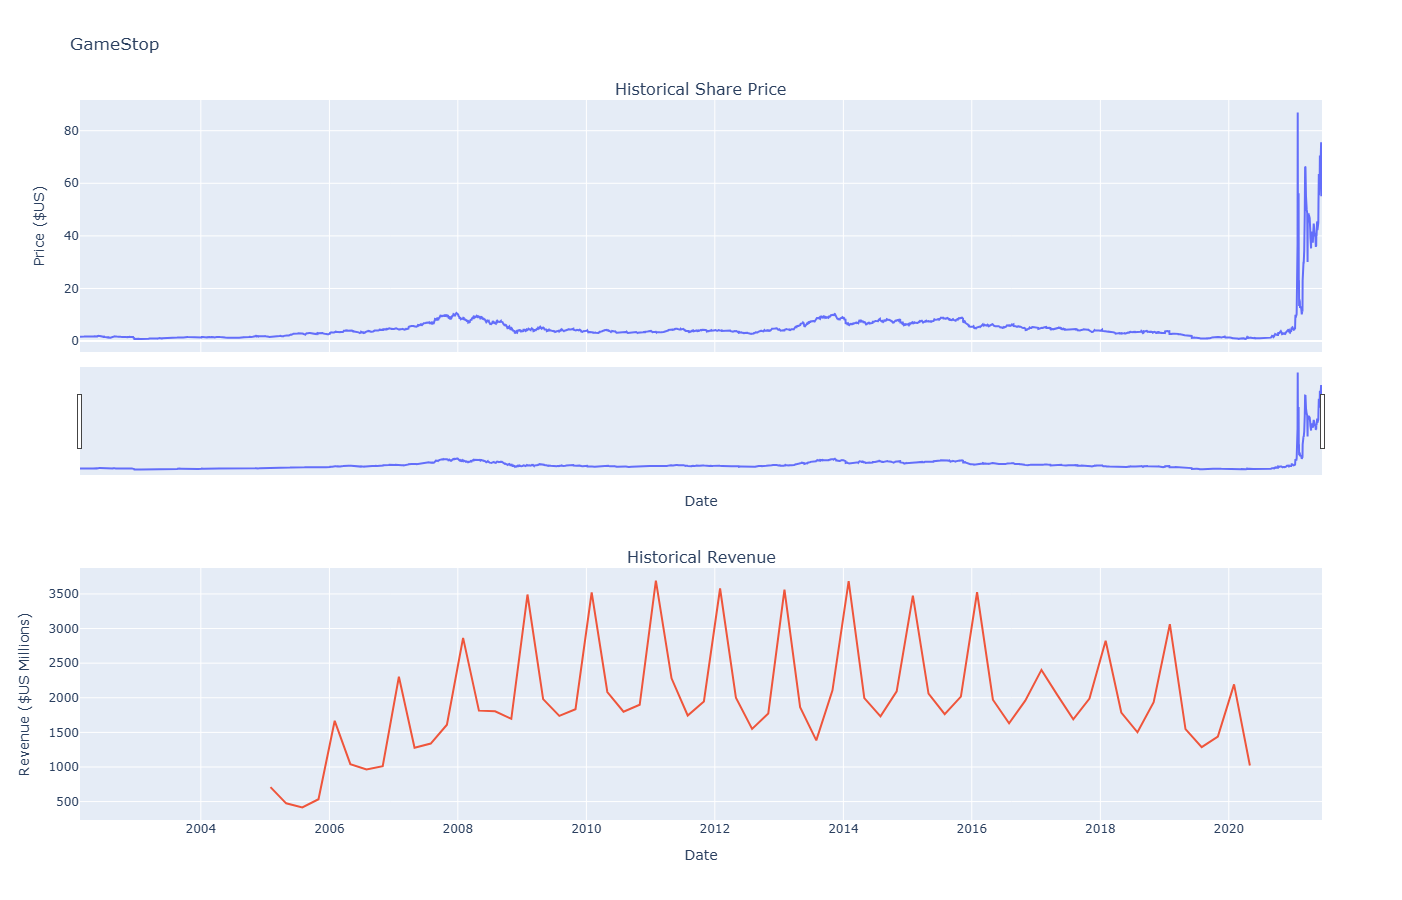

In [216]:
make_graph(gme_data, gme_revenue, 'GameStop')